https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

## Inlezen van de data

In [146]:
# Importeren van modules:

import pandas as pd
import numpy as np

# Inlezen van de dataset

df_loan = pd.read_csv("Data/loan_data.csv")

## Data en structuur bekijken 

In [147]:
# Lege cellen en dataypes bekijken
df_loan.info()

# Samenvattingen van de numerische kolommen (minimum en maximum waarden,... )
df_loan.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [148]:
# Overzicht van de eerste 5 rijen. ()is standaard 5 rijen
df_loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [149]:
print(f'The dataset has {df_loan.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [150]:
df_loan.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [151]:
# Print de kolomnamen 

print(df_loan.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [152]:
# Inlezen data in Sweetviz

import sweetviz as sv

# hack voor bug in de uitvoering
if not hasattr(np, 'VisibleDeprecationWarning'):
     np.VisibleDeprecationWarning = DeprecationWarning

report = sv.analyze(df_loan)

# Output het rapport als een HTML-bestand, dit opent ook automatisch in je webbrowser
report.show_html('Sweetviz_Loan.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Sweetviz_Loan.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [153]:
# Verwijderen van de onmogelijke leeftijden en carriere looptijden 

df_loan = df_loan[df_loan['person_age'] < 60] 
df_loan = df_loan[df_loan['person_emp_exp'] < 50] 

# check of de lijnen zijn verwijderd.

df_loan.shape



(44906, 14)

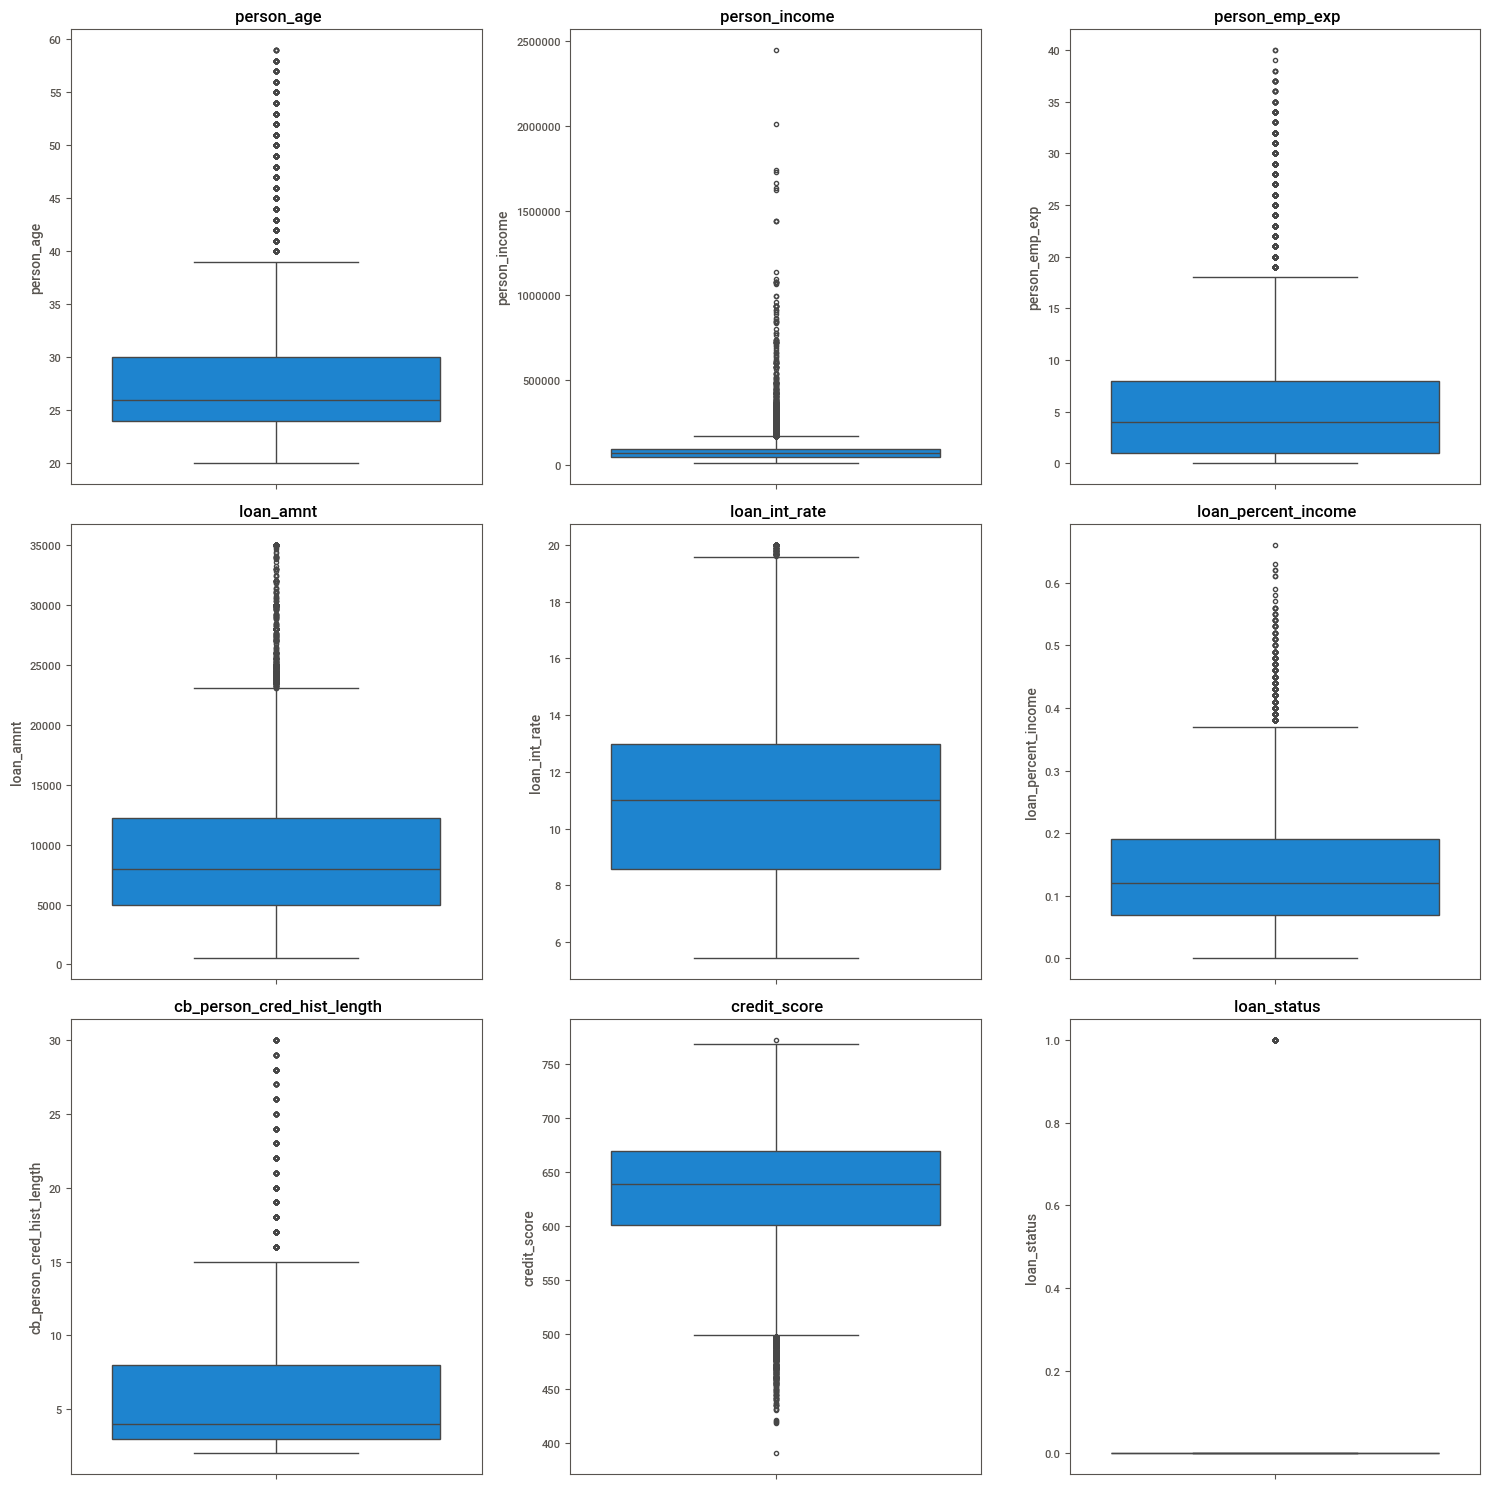

In [154]:
# printen van box plots om de outliers van de numerieke kolommen te bekijken

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['person_age', 'person_income','person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status']
plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_loan[col])
    plt.title(f' {col}')

plt.tight_layout()
plt.show()

## Outliers eruit halen

In [155]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Selecteer numerieke kolommen voor Isolation Forest
num_cols = df_loan.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_loan_scaled = df_loan.copy()
df_loan_scaled[num_cols] = scaler.fit_transform(df_loan[num_cols])

# Isolation Forest toepassen zonder standaardisatie
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% als outlier markeren

# Outliers bepalen 
outlier_preds = iso_forest.fit_predict(df_loan_scaled[num_cols])

# outliers aanduiden (-1 = outlier, 1 = geen outlier)
df_loan["outlier"] = outlier_preds
df_loan_cleaned = df_loan[df_loan["outlier"] == 1].drop(columns=["outlier"])

df_loan_cleaned.shape


(42660, 14)

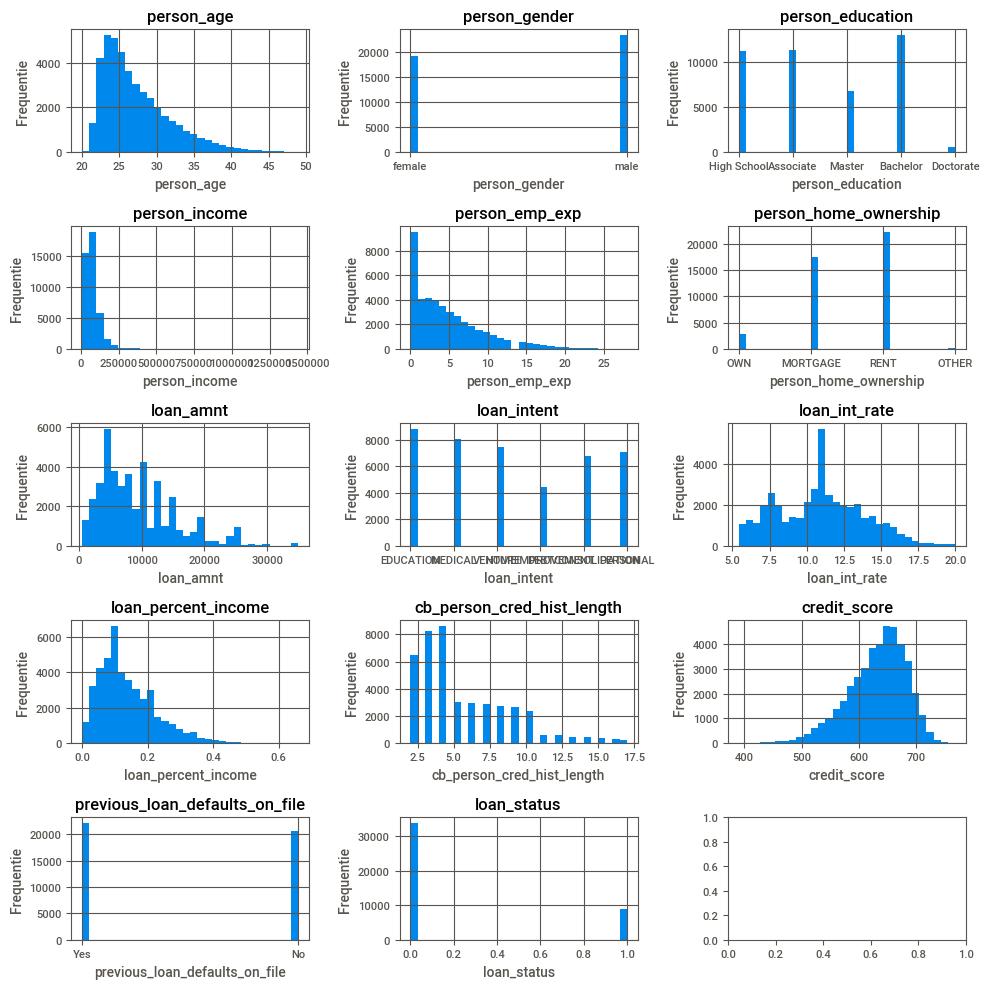

In [156]:
# Maak een grid van subplots
fig, axes = plt.subplots(5,3, figsize=(10, 10))
axes = axes.ravel()  

# Loop door elke kolom en maak een histogram 
for i, column in enumerate(df_loan_cleaned.columns):
    if i < 14:  
        df_loan_cleaned[column].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequentie')


plt.tight_layout()
plt.show()



## STARTMODEL

In [ ]:
# STARTMODEL

# # 5 % outliers verwijdert
# rare leeftijden en loopbaan tijden verwijdert
# Categorische waarden omgezet 
# Geen Stratify toegepast
# Geen Scaler toegepast --> lange looptijd
# Accuracy: 0.8053 --> lijkt ok maar als we de recall en F1 score bekijken worden we minder blij.
# Precision: 0.7000 --> Van de 100 voorspelde afgewezen leningen waren er 70 echt slecht (terecht afgewezen)
# Recall: 0.1179 --> van de 100 slechte leningen herkent het systeem er maar 11,8 
# F1 Score: 0.2018 --> model is niet goed in het ontdekken van slechte leningen.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


# Kopie van de cleaned dataset (df_loan_cleaned is de dataset waar we verder mee werken)
df_start = df_loan_cleaned.copy()

# Categorische features
cat_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 
                'previous_loan_defaults_on_file']
#Numerieke features
num_features = df_start.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('loan_status')  # Targetkolom verwijderen

# OneHot Encoding van categorische features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_cat = encoder.fit_transform(df_start[cat_features]).toarray()  
encoded_columns = encoder.get_feature_names_out(cat_features)
X_cat_df = pd.DataFrame(X_cat, columns=encoded_columns, index=df_start.index)

# Samenvoegen van numerieke en gecodeerde categorische features
X = pd.concat([df_start[num_features], X_cat_df], axis=1)

# Bepaal de target feature
y = df_start['loan_status']

# Splits de dataset in training en test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression training
model = LogisticRegression(max_iter=10000, random_state=42, solver='saga')  
model.fit(X_train, y_train)

# Voorspellingen maken
y_pred = model.predict(X_test)

# model performantie
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)

# Resultaten

print(accuracy)
print(precision)
print(recall)
print(f1)





0.8053211439287389
0.7
0.11791128579449747
0.20182604517059105


## MODEL VERBETEREN

## Log transformatie op de right skewed kolommen

In [158]:
# Log Transformatie

# omdat er in de kolommen person_emp_exp en loan_percent_income een 0 staat --> log1p

from scipy.stats import skew

# Scheef verdeelde numerieke kolommen
skewed_kolom = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income']

# Corrigeer negatieve of nulwaarden 
for col in skewed_kolom:
    min_value = df_loan_cleaned[col].min()
    
    # kolom waarden ≤ 0, verschuif alle waarden
    if min_value <= 0:
        df_loan_cleaned[col] = df_loan_cleaned[col] - min_value + 1  

# Nog nulwaarden, indien ja een waarschuwing
for col in skewed_kolom:
    min_value = df_loan_cleaned[col].min()
    if min_value <= 0:
        print(f"⚠️ WAARSCHUWING: {col} bevat nog steeds waarden ≤ 0! Controleer de dataset.")

# Log-transformatie toepassen 
for col in skewed_kolom:
    df_loan_cleaned[f'log_{col}'] = np.log1p(df_loan_cleaned[col])

# Nieuwe skewness na transformatie
    original_skew = skew(df_loan_cleaned[col])
    transformed_skew = skew(df_loan_cleaned[f'log_{col}'])
    print(f"{col}: van {original_skew:.2f}, naar: {transformed_skew:.2f}")




person_age: van 1.15, naar: 0.78
person_income: van 3.97, naar: 0.01
person_emp_exp: van 1.20, naar: 0.05
loan_amnt: van 1.13, naar: -0.46
loan_percent_income: van 0.97, naar: 0.86


In [159]:
for col in skewed_kolom:
    min_value = df_loan_cleaned[col].min()
    print(f"Minimale waarde in {col}: {min_value:.2f}")

Minimale waarde in person_age: 20.00
Minimale waarde in person_income: 8000.00
Minimale waarde in person_emp_exp: 1.00
Minimale waarde in loan_amnt: 500.00
Minimale waarde in loan_percent_income: 1.00


In [160]:
print(df_loan_cleaned.columns)

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'log_person_age', 'log_person_income', 'log_person_emp_exp',
       'log_loan_amnt', 'log_loan_percent_income'],
      dtype='object')


In [161]:
df_loan_log = df_loan_cleaned.copy()

df_loan_log

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,log_person_age,log_person_income,log_person_emp_exp,log_loan_amnt,log_loan_percent_income
1,21.0,female,High School,12282.0,1,OWN,1000.0,EDUCATION,11.14,1.08,2.0,504,Yes,0,3.091042,9.415971,0.693147,6.908755,0.732368
2,25.0,female,High School,12438.0,4,MORTGAGE,5500.0,MEDICAL,12.87,1.44,3.0,635,No,1,3.258097,9.428592,1.609438,8.612685,0.891998
5,21.0,female,High School,12951.0,1,OWN,2500.0,VENTURE,7.14,1.19,2.0,532,No,1,3.091042,9.469005,0.693147,7.824446,0.783902
9,21.0,female,High School,12739.0,1,OWN,1600.0,VENTURE,14.74,1.13,3.0,640,No,1,3.091042,9.452502,0.693147,7.378384,0.756122
11,21.0,female,Associate,13113.0,1,OWN,4500.0,HOMEIMPROVEMENT,8.63,1.34,2.0,651,No,1,3.091042,9.481436,0.693147,8.412055,0.850151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,7,RENT,15000.0,MEDICAL,15.66,1.31,3.0,645,No,1,3.332205,10.778373,2.079442,9.615872,0.837248
44996,37.0,female,Associate,65800.0,18,RENT,9000.0,HOMEIMPROVEMENT,14.07,1.14,11.0,621,No,1,3.637586,11.094390,2.944439,9.105091,0.760806
44997,33.0,male,Associate,56942.0,8,RENT,2771.0,DEBTCONSOLIDATION,10.02,1.05,10.0,668,No,1,3.526361,10.949806,2.197225,7.927324,0.717840
44998,29.0,male,Bachelor,33164.0,5,RENT,12000.0,EDUCATION,13.23,1.36,6.0,604,No,1,3.401197,10.409250,1.791759,9.392745,0.858662


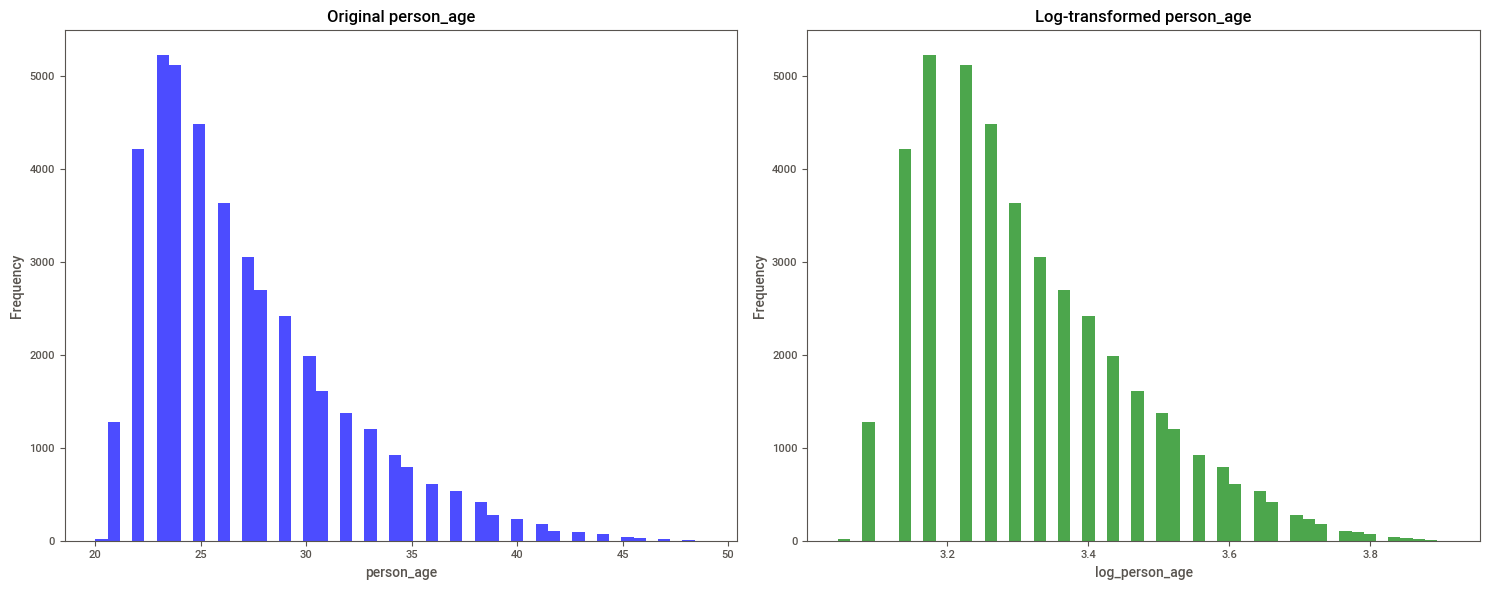

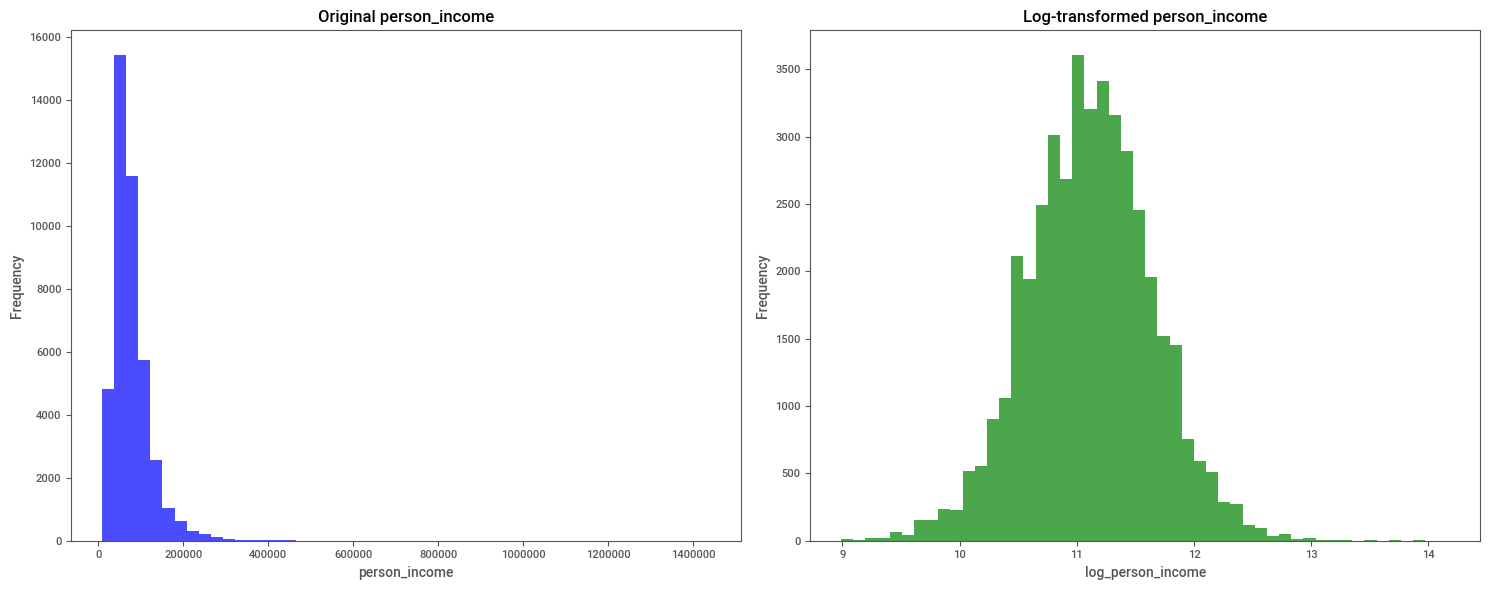

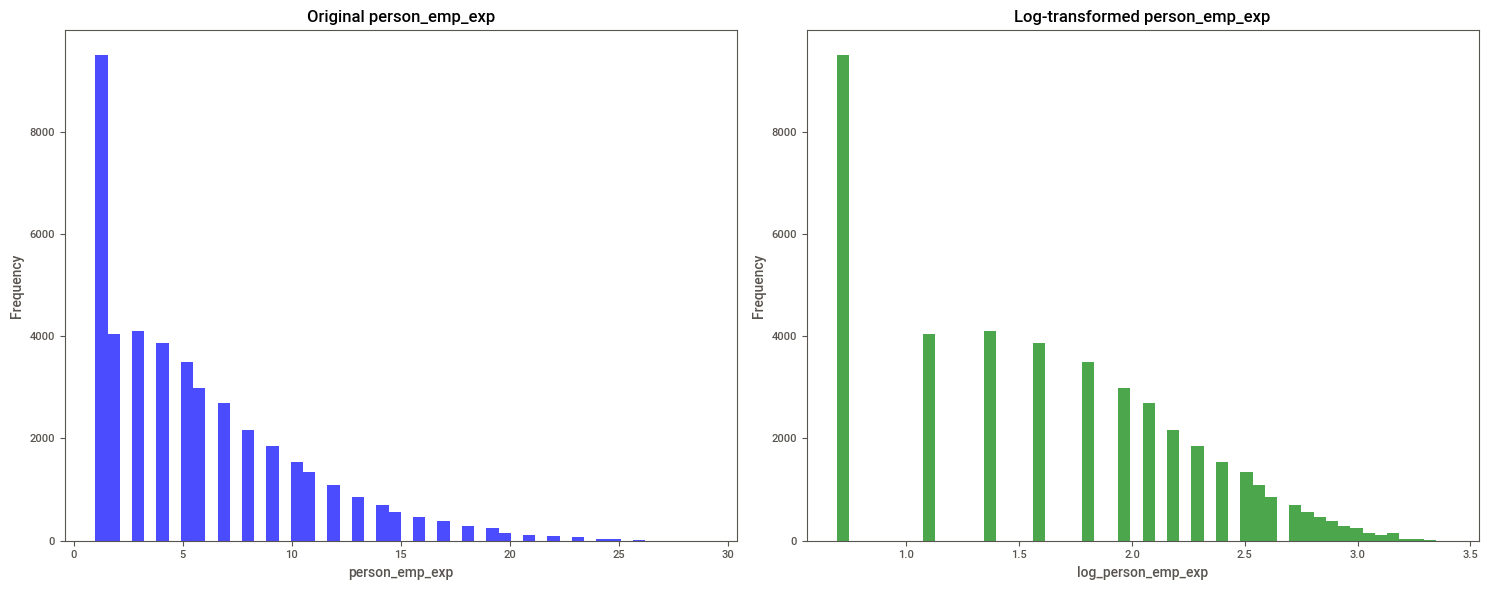

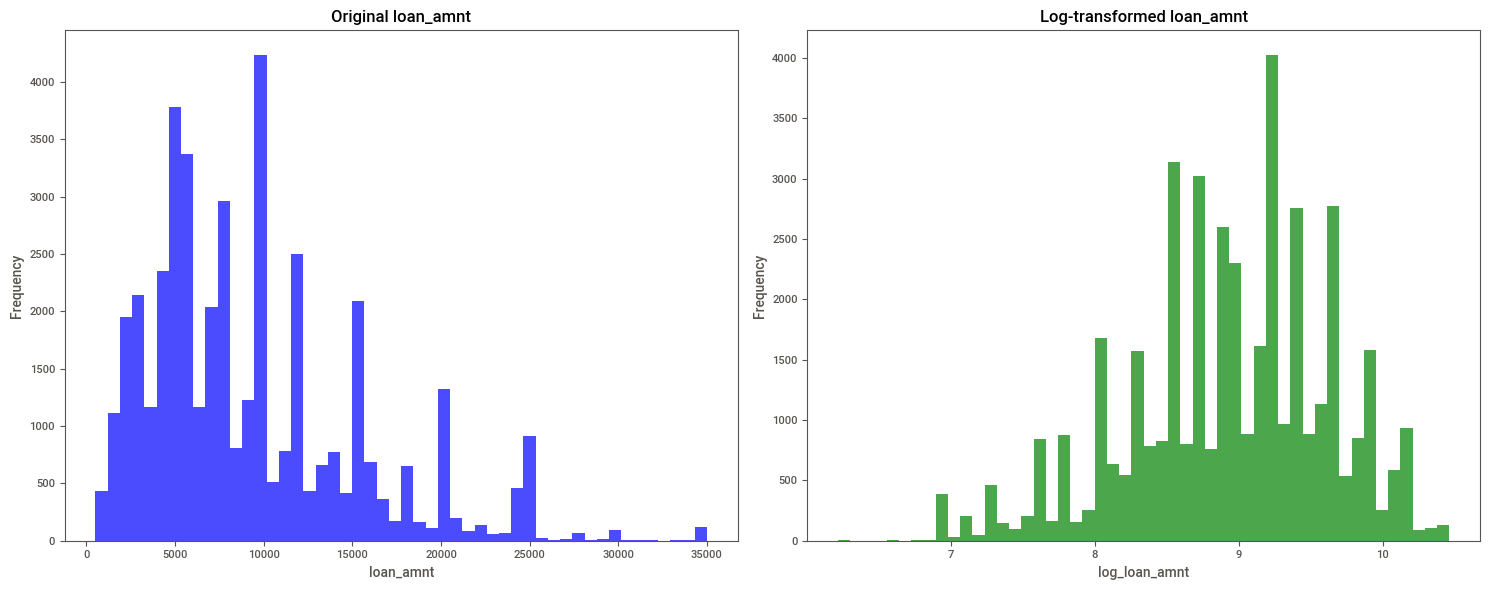

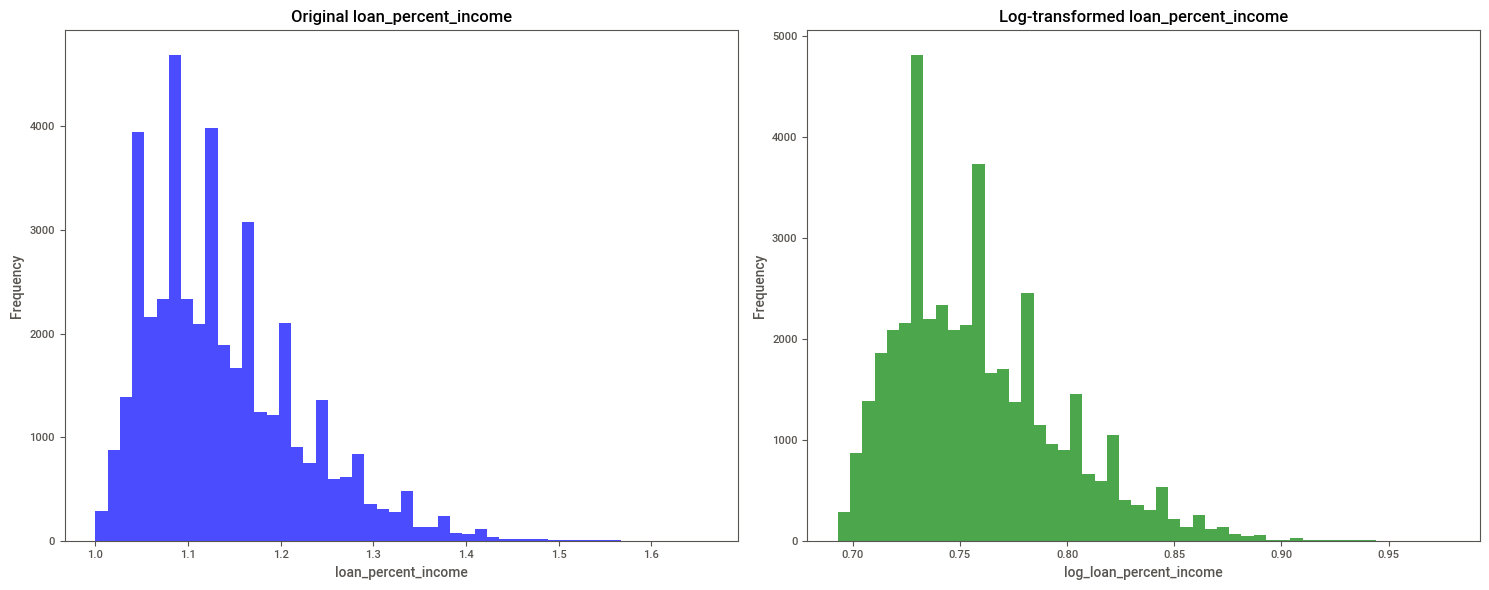

In [162]:

# Plot de verdeling voor en na de transformatie voor elke kolom
for col in skewed_kolom:
    plt.figure(figsize=(15, 6))
    
    # Voor
    plt.subplot(1, 2, 1)
    plt.hist(df_loan_cleaned[col], bins=50, color='blue', alpha=0.7)
    plt.title(f'Original {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Na
    plt.subplot(1, 2, 2)
    plt.hist(df_loan_cleaned[f'log_{col}'], bins=50, color='green', alpha=0.7)
    plt.title(f'Log-transformed {col}')
    plt.xlabel(f'log_{col}')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


## Model trainen

In [ ]:
# Model 1 

# Aanpassingen:
# Log transformation op de right skewed numerische features
# Stratify toepassen
# Scaler toepassen 
# Accuracy: 0.8985 tov 0.8053 --> model maak veel minder fouten dn mijn startmodel
# Precision: 0.7725 tov  0.7000 --> Minder goede leningen worden afgewezen
# Recall: 0.7282 tov 0.1179 --> Veel meer slechte leningen worden afgewezen
# F1 Score: 0.7497 tov 0.2018 --> beter model


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
 

# De log-getransformeerde numerieke features 
log_num_features = [f'log_{col}' for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income']]

# De andere numerieke features (niet-log getransformeerd, maar wel schalen)
other_num_features = ['loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']

# Combineer alle numerieke features die geschaald moeten worden
num_features = log_num_features + other_num_features

# Definieer de categorische features
cat_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 
                'previous_loan_defaults_on_file']

# Pipeline voor numerieke features (alle numerieke features worden geschaald)
num_transformer = Pipeline([
    ('scaler', StandardScaler())  
])

# Pipeline voor categorische features (OneHotEncoding)
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Stap 5: ColumnTransformer maken
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),  
    ('cat', cat_transformer, cat_features)])  

# Definieer X en y
X = df_loan_log.drop(columns=['loan_status', 'person_age', 'person_income', 'person_emp_exp', 'loan_amnt','loan_percent_income'])
y = df_loan_log['loan_status']

# Splits de data in train- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  pipeline met Logistic Regression
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train het model
model_pipeline.fit(X_train, y_train)

# Voorspellingen
y_pred = model_pipeline.predict(X_test)

# model performantie
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)


print(accuracy)
print(precision)
print(recall)
print(f1)


0.8984997655883732
0.7724836212030971
0.7282425603593486
0.7497109826589595


In [164]:
# Model 2

# Aanpassingen:
# Class Weight toegevoegd  

# Accuracy: 0.8654 daalt van 0.8985 --> gaat meer fouten maken
# Precision: 0.6200 daalt van 0.7725 we gaan dus meer leningen afwijzen die eigenlijk goed waren 
# Recall: 0.9180 stijgt van 0.7282 --> in staat om bijna alle slechte leningen eruit te halen
# F1 Score: 0.7402 daalt van 0.7497 Dit model haalt er meer slechte betalers uit, maar weigert er ook meer goede en jaagt dus business weg.


log_num_features = [f'log_{col}' for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income']]

other_num_features = ['loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']

num_features = log_num_features + other_num_features

cat_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 
                'previous_loan_defaults_on_file']

num_transformer = Pipeline([
    ('scaler', StandardScaler())  
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),  
    ('cat', cat_transformer, cat_features)])  

X = df_loan_log.drop(columns=['loan_status', 'person_age', 'person_income', 'person_emp_exp', 'loan_amnt','loan_percent_income'])
y = df_loan_log['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))  # Class weight toegevoegd
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)


print(accuracy)
print(precision)
print(recall)
print(f1)

0.8654477262072199
0.6200227531285551
0.9180235822571589
0.740153915799004


beste features: ['log_loan_amnt', 'log_loan_percent_income', 'loan_int_rate', 'person_gender_female', 'person_gender_male', 'person_home_ownership_OWN', 'loan_intent_EDUCATION', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes']
0.8924050632911392
0.7585380467345716
0.7108366086468276
0.7339130434782609


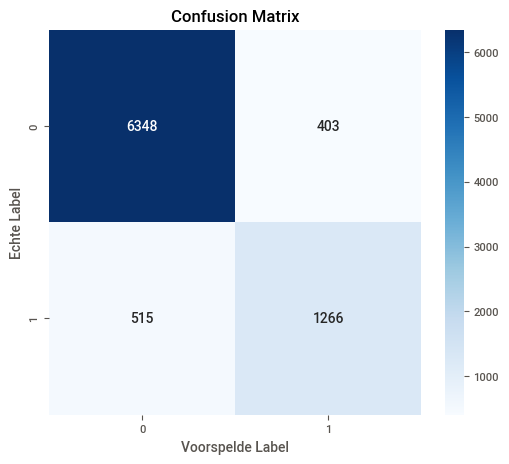

In [165]:
# Model 3

# Aanpassingen:
# RFE kiest de beste features
# Accuracy: 0.8924 
# Precision: 0.7585 
# Recall: 0.7108
# F1 Score: 0.7339 


from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

log_num_features = [f'log_{col}' for col in ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income']]
other_num_features = ['loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']
num_features = log_num_features + other_num_features

cat_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

num_transformer = Pipeline([
    ('scaler', StandardScaler())  
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# 
X = df_loan_log.drop(columns=['loan_status'])  
y = df_loan_log['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Feature Selection met RFE
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
X_train_selected = rfe_selector.fit_transform(X_train_transformed, y_train)
X_test_selected = rfe_selector.transform(X_test_transformed)


all_features = np.concatenate([num_features, preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)])
selected_features = all_features[rfe_selector.support_]
print(f"beste features: {list(selected_features)}")

model_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])


model_pipeline.fit(X_train_selected, y_train)


y_pred = model_pipeline.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Voorspelde Label")
plt.ylabel("Echte Label")
plt.title("Confusion Matrix")
plt.show()


In [166]:
df_loan_log

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,log_person_age,log_person_income,log_person_emp_exp,log_loan_amnt,log_loan_percent_income
1,21.0,female,High School,12282.0,1,OWN,1000.0,EDUCATION,11.14,1.08,2.0,504,Yes,0,3.091042,9.415971,0.693147,6.908755,0.732368
2,25.0,female,High School,12438.0,4,MORTGAGE,5500.0,MEDICAL,12.87,1.44,3.0,635,No,1,3.258097,9.428592,1.609438,8.612685,0.891998
5,21.0,female,High School,12951.0,1,OWN,2500.0,VENTURE,7.14,1.19,2.0,532,No,1,3.091042,9.469005,0.693147,7.824446,0.783902
9,21.0,female,High School,12739.0,1,OWN,1600.0,VENTURE,14.74,1.13,3.0,640,No,1,3.091042,9.452502,0.693147,7.378384,0.756122
11,21.0,female,Associate,13113.0,1,OWN,4500.0,HOMEIMPROVEMENT,8.63,1.34,2.0,651,No,1,3.091042,9.481436,0.693147,8.412055,0.850151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,7,RENT,15000.0,MEDICAL,15.66,1.31,3.0,645,No,1,3.332205,10.778373,2.079442,9.615872,0.837248
44996,37.0,female,Associate,65800.0,18,RENT,9000.0,HOMEIMPROVEMENT,14.07,1.14,11.0,621,No,1,3.637586,11.094390,2.944439,9.105091,0.760806
44997,33.0,male,Associate,56942.0,8,RENT,2771.0,DEBTCONSOLIDATION,10.02,1.05,10.0,668,No,1,3.526361,10.949806,2.197225,7.927324,0.717840
44998,29.0,male,Bachelor,33164.0,5,RENT,12000.0,EDUCATION,13.23,1.36,6.0,604,No,1,3.401197,10.409250,1.791759,9.392745,0.858662


## Feature engineering

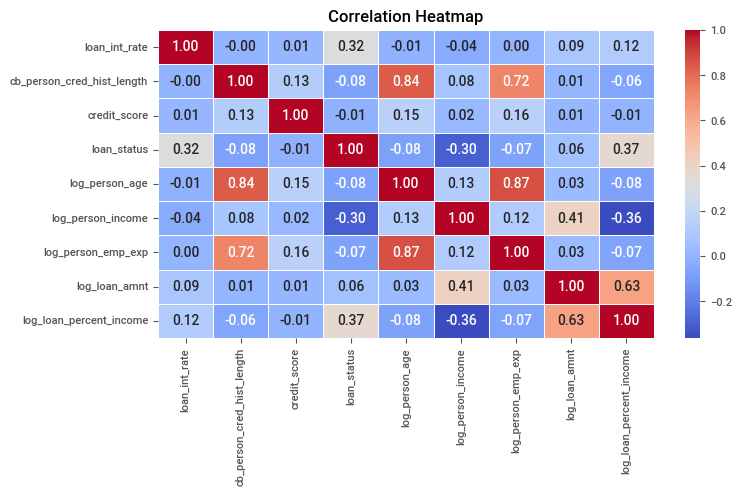

In [167]:

# correlatie matrix 

df_loan_cor= df_loan_log.drop(columns=['person_age','person_income','loan_amnt','loan_percent_income','person_emp_exp'])

numeric_data = df_loan_cor.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

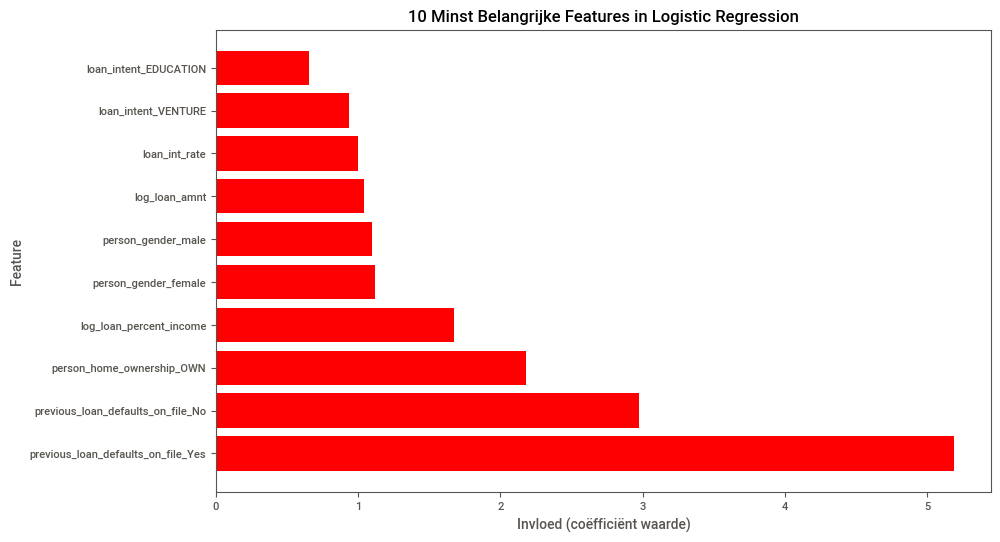

['loan_intent_EDUCATION', 'loan_intent_VENTURE', 'loan_int_rate', 'log_loan_amnt', 'person_gender_male', 'person_gender_female', 'log_loan_percent_income', 'person_home_ownership_OWN', 'previous_loan_defaults_on_file_No', 'previous_loan_defaults_on_file_Yes']


In [168]:
# Haal de coëfficiënten van het getrainde model op
logistic_model = model_pipeline.named_steps['classifier']

# Controleer of het model coëfficiënten heeft
if not hasattr(logistic_model, 'coef_'):
    raise ValueError("Het model bevat geen coëfficiënten. Controleer of Logistic Regression correct getraind is.")

# Bereken de absolute waarde van de coëfficiënten (hoe kleiner, hoe minder belangrijk)
coefficients = np.abs(logistic_model.coef_).flatten()

# Haal de juiste feature namen op na preprocessing en RFE
all_features = np.concatenate([
    num_features,  # Originele numerieke feature-namen
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)  # OneHotEncoded feature-namen
])

# Selecteer alleen de namen die door RFE zijn behouden
selected_feature_names = all_features[rfe_selector.support_]

# Maak een dataframe met feature importance
feature_importance_df = pd.DataFrame({'Kolom': selected_feature_names, 'Belangrijkheid': coefficients})

# Sorteer de features op minst belangrijke kolommen
feature_importance_df = feature_importance_df.sort_values(by='Belangrijkheid', ascending=True)

# Selecteer de minst belangrijke kolommen
num_least_important = 10  # Aantal kolommen dat je wilt zien
least_important_columns = feature_importance_df.head(num_least_important)['Kolom'].tolist()

# Bar-plot van de minst belangrijke features
plt.figure(figsize=(10, 6))
plt.barh(least_important_columns, feature_importance_df['Belangrijkheid'].head(num_least_important), color='red')
plt.xlabel("Invloed (coëfficiënt waarde)")
plt.ylabel("Feature")
plt.title(f"{num_least_important} Minst Belangrijke Features in Logistic Regression")
plt.gca().invert_yaxis()  # Minst belangrijke bovenaan zetten
plt.show()


print(least_important_columns)





In [169]:

correlation_matrix = df_loan_cor.corr(numeric_only=True)
correlation_list = correlation_matrix.unstack().sort_values(ascending=False)

correlation_list

loan_int_rate               loan_int_rate                 1.000000
cb_person_cred_hist_length  cb_person_cred_hist_length    1.000000
log_person_emp_exp          log_person_emp_exp            1.000000
log_loan_percent_income     log_loan_percent_income       1.000000
log_loan_amnt               log_loan_amnt                 1.000000
                                                            ...   
log_person_age              loan_status                  -0.083142
log_person_income           loan_status                  -0.301661
loan_status                 log_person_income            -0.301661
log_person_income           log_loan_percent_income      -0.362302
log_loan_percent_income     log_person_income            -0.362302
Length: 81, dtype: float64

In [170]:
df_loan_cor


,person_gender,person_education,person_home_ownership,loan_intent,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,log_person_age,log_person_income,log_person_emp_exp,log_loan_amnt,log_loan_percent_income
1,female,High School,OWN,EDUCATION,11.14,2.0,504,Yes,0,3.091042,9.415971,0.693147,6.908755,0.732368
2,female,High School,MORTGAGE,MEDICAL,12.87,3.0,635,No,1,3.258097,9.428592,1.609438,8.612685,0.891998
5,female,High School,OWN,VENTURE,7.14,2.0,532,No,1,3.091042,9.469005,0.693147,7.824446,0.783902
9,female,High School,OWN,VENTURE,14.74,3.0,640,No,1,3.091042,9.452502,0.693147,7.378384,0.756122
11,female,Associate,OWN,HOMEIMPROVEMENT,8.63,2.0,651,No,1,3.091042,9.481436,0.693147,8.412055,0.850151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,15.66,3.0,645,No,1,3.332205,10.778373,2.079442,9.615872,0.837248
44996,female,Associate,RENT,HOMEIMPROVEMENT,14.07,11.0,621,No,1,3.637586,11.094390,2.944439,9.105091,0.760806
44997,male,Associate,RENT,DEBTCONSOLIDATION,10.02,10.0,668,No,1,3.526361,10.949806,2.197225,7.927324,0.717840
44998,male,Bachelor,RENT,EDUCATION,13.23,6.0,604,No,1,3.401197,10.409250,1.791759,9.392745,0.858662


In [171]:
df_loan_drop = df_loan_cor.drop(columns=['log_person_age', 'person_education','loan_intent','log_person_emp_exp','person_gender'])

In [172]:
df_loan_drop

,person_home_ownership,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,log_person_income,log_loan_amnt,log_loan_percent_income
1,OWN,11.14,2.0,504,Yes,0,9.415971,6.908755,0.732368
2,MORTGAGE,12.87,3.0,635,No,1,9.428592,8.612685,0.891998
5,OWN,7.14,2.0,532,No,1,9.469005,7.824446,0.783902
9,OWN,14.74,3.0,640,No,1,9.452502,7.378384,0.756122
11,OWN,8.63,2.0,651,No,1,9.481436,8.412055,0.850151
...,...,...,...,...,...,...,...,...,...
44995,RENT,15.66,3.0,645,No,1,10.778373,9.615872,0.837248
44996,RENT,14.07,11.0,621,No,1,11.094390,9.105091,0.760806
44997,RENT,10.02,10.0,668,No,1,10.949806,7.927324,0.717840
44998,RENT,13.23,6.0,604,No,1,10.409250,9.392745,0.858662


In [173]:
# Model 4

# Droppen sterk gecorreleerde features

# Accuracy:  0.8665 
# Precision: 0.6915 
# Recall:  0.6508 
# F1 Score:  0.6705 


log_num_features = [f'log_{col}' for col in ['log_person_income', 'log_loan_amnt', 'log_person_cred_history_lenght','log_loan_percent_income','log_person_emp_exp'
]]
other_num_features = ['loan_int_rate',  'credit_score','cb_person_cred_hist_length']

num_features = log_num_features + other_num_features

num_features = other_num_features

cat_features = ['person_home_ownership', 'previous_loan_defaults_on_file']


num_transformer = Pipeline([
    ('scaler', StandardScaler())  
])

cat_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),  
    ('cat', cat_transformer, cat_features)  
])

X = df_loan_drop.drop(columns=['loan_status'])
y = df_loan_drop['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)


print(accuracy)
print(precision)
print(recall)
print(f1)



0.866502578527895
0.6915274463007159
0.6507580011229647
0.6705235753543535


## meer outliers verwijderen

## Een hoger percentages van de outliers verwijderen helpt de scores niet


## Startmodel
Met 5 % van de outliers verwijderen 

Accuracy: 0.8053
Precision: 0.7000 
Recall: 0.1179 
F1 Score: 0.2018

Met 10 % van de outliers verwijderen

Accuracy: van 0.8053 naar 0.8141
Precision: van 0.7000 naar 0.6666
Recall: van 0.1179 naar 0.0694
F1 Score: van 0.2018 naar 0.1257

Met 15 % van de outliers verwijderen

Accuracy: van 0.8053 naar 0.8263
Precision: van 0.7000 naar 0.4118
Recall: van 0.1179 naar 0.0159
F1 Score: van 0.2018 naar 0.307

## model 1
Met 5 % van de outliers verwijderen 

Accuracy: 0.8985 --> model maak veel minder fouten dan mijn startmodel zonder enige techniek en loopt veel sneller
Precision: 0.7725 --> van de 100 geweigerde leningen is dat in 77 gevallen correct
Recall: 0.7282 --> van de 100 slechte leningen zijn er 72 leningen corect afgewezen
F1 Score: 0.7497 

met 10% van de outliers verwijderen 

Accuracy: van 0.8985 naar 0.9056
Precision: van 0.7725 naar 0.7645
Recall: van 0.7282 naar 0.7365
F1 Score: van 0.7497 naar 0.7502

met 15% van de outliers verwijderen 

Accuracy: van 0.8985 naar 0.9046
Precision: van 0.7725 naar 0.7384
Recall: van 0.7282 naar 0.6925
F1 Score: van 0.7497 naar 0.7147

# Model 2

Aanpassingen:
Class Weight toegevoegd  

Met 5 % van de outliers verwijderen 

Accuracy: 0.8654 daalt van 0.8985 --> gaat meer fouten maken
Precision: 0.6200 daalt van 0.7725 we gaan dus meer leningen afwijzen die eigenlijk goed waren 
Recall: 0.9180 stijgt van 0.7282 --> in staat om bijna alle slechte leningen eruit te halen
F1 Score: 0.7402 daalt van 0.7497 Dit model haalt er meer slechte betalers uit, maar weigert er ook meer goede en jaagt dus business weg.

Met 10 % van de outliers verwijderen 

Accuracy: van 0.8654 naar 0.8576
Precision: van 0.62 naar 0.5812
Recall: van 0.9180 naar 0.9312
F1 Score: van 0.7402 naar 0.7157

met 15% van de outliers verwijderen

Accuracy: van 0.8654 naar 0.8573
Precision: van 0.62 naar 0.5514
Recall: van 0.9180 naar 0.9278
F1 Score: van 0.7402 naar 0.6917

## model 3
Accuracy: 0.8924 
Precision: 0.7585
Recall: 0.7108 
F1 Score: 0.7339

met 10% van de outliers verwijderen 

Accuracy: van 0.8924 naar 0.8963
Precision: van 0.7585 naar 0.7469
Recall: van 0.7108 naar 0.6979
F1 Score: van 0.7339 naar 0.7215

met 15% van de outliers verwijderen 

Accuracy: van 0.8924 naar 0.9000
Precision: van 0.7585 naar 0.7300
Recall: van 0.7108 naar 0.6674
F1 Score: van 0.7339 naar 0.6973

## model 4
Accuracy: 0.8665
Precision: 0.6915 
Recall: 0.6508 
F1 Score: 0.6705

met 10% van de outliers verwijderen 

Accuracy: van 0.8665 naar 0.8682
Precision: van 0.6915 naar 0.6685
Recall: van 0.6508 naar 0.6259
F1 Score: van 0.6705 naar 0.6465

met 15% van de outliers verwijderen 

Accuracy: van 0.8665 naar 0.8771
Precision: van 0.6915 naar 0.6690
Recall: van 0.6508 naar 0.5694
F1 Score: van 0.6705 naar 0.6152